# Potato Disease Classification Using VGG16 Model

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Unzipping data from drive

In [ ]:
!unzip "/content/drive/MyDrive/Potato.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Potato/anomaly/image6707.jpg  
  inflating: Potato/anomaly/image6709.jpg  
  inflating: Potato/anomaly/image671.jpg  
  inflating: Potato/anomaly/image6710.jpg  
  inflating: Potato/anomaly/image6711.jpg  
  inflating: Potato/anomaly/image6714.jpg  
  inflating: Potato/anomaly/image6716.jpg  
  inflating: Potato/anomaly/image6719.jpg  
  inflating: Potato/anomaly/image6720.jpg  
  inflating: Potato/anomaly/image6721.jpg  
  inflating: Potato/anomaly/image6725.jpg  
  inflating: Potato/anomaly/image6728.jpg  
  inflating: Potato/anomaly/image6729.jpg  
  inflating: Potato/anomaly/image6730.jpg  
  inflating: Potato/anomaly/image6731.jpg  
  inflating: Potato/anomaly/image6732.jpg  
  inflating: Potato/anomaly/image6738.jpg  
  inflating: Potato/anomaly/image6746.jpg  
  inflating: Potato/anomaly/image6747.jpg  
  inflating: Potato/anomaly/image6749.jpg  
  inflating: Potato/anomaly/image675.jpg  
  inflating: Potato/anomaly

### Removing the unwanted folders

In [ ]:
!rm -rf "/content/Potato/Background_without_leaves"

In [ ]:
!rm -rf "/content/Potato/Miscellaneous"

In [ ]:
!rm -rf "/content/Potato/anomaly"

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('/content/Potato/Potato___Early_blight/image (10).JPG')
img.size

(256, 256)

## Pre-processing


### Counting the number of images in each sub-folders

In [ ]:
# prompt: image counts of each folders and subfolders

import os

def count_images(root_directory):
  """
  Counts the number of images in a directory and its subdirectories.

  Args:
    root_directory: The root directory to count images in.

  Returns:
    A dictionary where the keys are the subdirectories and the values are the number of images in each subdirectory.
  """

  image_counts = {}

  for subdirectory in os.listdir(root_directory):
    subdirectory_path = os.path.join(root_directory, subdirectory)

    if os.path.isdir(subdirectory_path):
      image_count = 0

      for file_name in os.listdir(subdirectory_path):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
          image_count += 1

      image_counts[subdirectory] = image_count

  return image_counts

# Example usage
root_directory = '/content/Potato'
image_counts = count_images(root_directory)

for subdirectory, count in image_counts.items():
  print(f"Subdirectory: {subdirectory}, Image count: {count}")

Subdirectory: Potato___healthy, Image count: 152
Subdirectory: Dry Rot, Image count: 60
Subdirectory: Healthy Potatoes, Image count: 80
Subdirectory: Pink Rot, Image count: 57
Subdirectory: Common Scab, Image count: 62
Subdirectory: Potato___Early_blight, Image count: 1000
Subdirectory: Blackleg, Image count: 60
Subdirectory: Potato___Late_blight, Image count: 1000
Subdirectory: Black Scurf, Image count: 58


### Resizing the images

In [ ]:
# from PIL import Image
import os

def resize_images(input_folder, output_folder, target_size=(224, 224)):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all subfolders in the input folder
    for subfolder in os.listdir(input_folder):
        subfolder_path = os.path.join(input_folder, subfolder)
        if os.path.isdir(subfolder_path):  # Check if it's a directory
            output_subfolder = os.path.join(output_folder, subfolder)
            if not os.path.exists(output_subfolder):
                os.makedirs(output_subfolder)
            # Loop through all files in the subfolder
            for filename in os.listdir(subfolder_path):
                # Check if the file is an image
                if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.JPEG')):
                    # Open the image file
                    with Image.open(os.path.join(subfolder_path, filename)) as img:
                        # Resize the image
                        resized_img = img.resize(target_size)
                        # Convert image mode if necessary
                        if resized_img.mode in ('RGBA', 'P'):
                            resized_img = resized_img.convert('RGB')
                        # Save the resized image to the output folder
                        resized_img.save(os.path.join(output_subfolder, filename))

# Specify the input and output folders
input_folder = '/content/Potato'
output_folder = '/content/resize1'

# Call the function to resize images
resize_images(input_folder, output_folder)

In [ ]:
img = Image.open('/content/resize1/Pink Rot/10.jpg')
img.size

(224, 224)

### image inversion

In [ ]:


from PIL import Image
import os

def invert_images(input_folder, output_folder):
    """
    Inverts the colors of images in a directory and its subdirectories.

    Args:
      input_folder: The root directory containing the images.
      output_folder: The directory where inverted images will be saved.
    """

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all subfolders in the input folder
    for subfolder in os.listdir(input_folder):
        subfolder_path = os.path.join(input_folder, subfolder)
        if os.path.isdir(subfolder_path):  # Check if it's a directory
            output_subfolder = os.path.join(output_folder, subfolder)
            if not os.path.exists(output_subfolder):
                os.makedirs(output_subfolder)
            # Loop through all files in the subfolder
            for filename in os.listdir(subfolder_path):
                # Check if the file is an image
                if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
                    # Open the image file
                    with Image.open(os.path.join(subfolder_path, filename)) as img:
                        # Invert the colors
                        inverted_img = Image.eval(img, lambda x: 255 - x)
                        # Save the inverted image to the output folder
                        inverted_img.save(os.path.join(output_subfolder, filename))

# Specify the input and output folders
input_folder = '/content/resize1'
output_folder = '/content/inverted1'

# Call the function to invert images
invert_images(input_folder, output_folder)


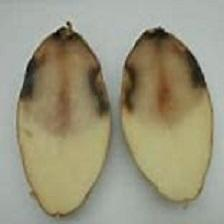

In [ ]:
img = Image.open('/content/resize1/Pink Rot/10.jpg')
img

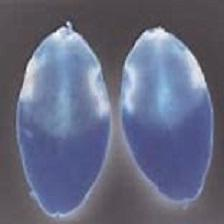

In [ ]:
img = Image.open('/content/inverted1/Pink Rot/10.jpg')
img

### Data Augmentation
use either code 1 or code 2 for augmentation

In [ ]:
base_dir = '/content/inverted1'

code 1 working

In [ ]:
import os
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

def augment_images(source_directory, output_directory, target_count=2000):
    # Create an ImageDataGenerator
    datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    zca_whitening=True,
    zca_epsilon=1e-06,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.1,
    channel_shift_range=0.2,
    fill_mode='nearest',
    cval=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

    # Ensure the destination directory exists; create it if necessary
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Get the list of files in the source directory
    image_files = [f for f in os.listdir(source_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Calculate the number of additional images needed
    existing_images = len(image_files)
    images_per_original = max(1, target_count // existing_images)

    # Augment images until the target count is reached
    for filename in tqdm(image_files, desc="Augmenting images"):
        img_path = os.path.join(source_directory, filename)
        img = image.load_img(img_path)
        img_array = image.img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_directory, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= images_per_original:
                break

    # Remove excess images from the output directory
    output_images = os.listdir(output_directory)
    for i in range(len(output_images) - target_count):
        os.remove(os.path.join(output_directory, output_images[i]))

    print(f"Augmentation complete. Total images in '{output_directory}': {len(os.listdir(output_directory))}")

import os

# Specify the root directory containing subfolders
root_directory = base_dir

# Iterate through subfolders
for subfolder in os.listdir(root_directory):
    subfolder_path = os.path.join(root_directory, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Define source and output directories for the current subfolder
        source_directory = subfolder_path
        output_directory = os.path.join('/content/Augmented5', subfolder)

        # Call the augment_images function for the current subfolder
        augment_images(source_directory, output_directory, target_count=3000)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1054: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(
Augmenting images:   0%|          | 0/152 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1286: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
Augmenting images: 100%|██████████| 152/152 [00:35<00:00,  4.24it/s]
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1054: UserWarning: This ImageDataGenerator specifie

Augmentation complete. Total images in '/content/Augmented5/Potato___healthy': 2532


Augmenting images: 100%|██████████| 60/60 [00:37<00:00,  1.59it/s]


Augmentation complete. Total images in '/content/Augmented5/Dry Rot': 2574


Augmenting images: 100%|██████████| 80/80 [00:35<00:00,  2.24it/s]


Augmentation complete. Total images in '/content/Augmented5/Healthy Potatoes': 2559


Augmenting images: 100%|██████████| 57/57 [00:34<00:00,  1.65it/s]


Augmentation complete. Total images in '/content/Augmented5/Pink Rot': 2555


Augmenting images: 100%|██████████| 62/62 [00:35<00:00,  1.76it/s]


Augmentation complete. Total images in '/content/Augmented5/Common Scab': 2580


Augmenting images: 100%|██████████| 1000/1000 [00:37<00:00, 26.54it/s]


Augmentation complete. Total images in '/content/Augmented5/Potato___Early_blight': 2595


Augmenting images: 100%|██████████| 60/60 [00:36<00:00,  1.66it/s]


Augmentation complete. Total images in '/content/Augmented5/Blackleg': 2621


Augmenting images: 100%|██████████| 1000/1000 [00:37<00:00, 26.64it/s]


Augmentation complete. Total images in '/content/Augmented5/Potato___Late_blight': 2599


Augmenting images: 100%|██████████| 58/58 [00:34<00:00,  1.70it/s]

Augmentation complete. Total images in '/content/Augmented5/Black Scurf': 2588


code 2 for augmentation [can try dont know working or not]

In [ ]:
import numpy as np
import sys

# Monkey-patch numpy to use np.bool_
sys.modules['numpy'].bool = np.bool_

import os
import random
from tqdm import tqdm
from PIL import Image
import imgaug.augmenters as iaa

def augment_image(image, augmenter):
    image_np = np.array(image)
    augmented_image_np = augmenter(image=image_np)
    augmented_image = Image.fromarray(augmented_image_np)
    return augmented_image

def augment_images(source_directory, output_directory, target_count):
    # Define the augmentation pipeline using imgaug
    augmenter = iaa.Sequential([
        iaa.SomeOf((1, 4), [
            iaa.Fliplr(0.5),  # horizontal flips
            iaa.Affine(rotate=(-10, 10)),  # rotations
            iaa.Affine(scale=(0.8, 1.2)),  # zoom
            iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),  # translations
            iaa.AdditiveGaussianNoise(scale=(10, 20)),  # Gaussian noise
            iaa.Multiply((0.8, 1.2)),  # brightness
            iaa.LinearContrast((0.8, 1.2))  # contrast
        ])
    ])

    # Ensure the destination directory exists; create it if necessary
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Get the list of files in the source directory
    image_files = [f for f in os.listdir(source_directory) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))]

    # Calculate the number of additional images needed
    existing_images = len(image_files)
    images_per_original = max(1, target_count // existing_images)

    # Augment images until the target count is reached
    for filename in tqdm(image_files, desc=f"Augmenting images in {source_directory}"):
        img_path = os.path.join(source_directory, filename)
        img = Image.open(img_path)

        # Save the original image to the output directory
        img.save(os.path.join(output_directory, f'orig_{filename}'))

        # Generate augmented images
        for i in range(images_per_original):
            augmented_image = augment_image(img, augmenter)
            augmented_image.save(os.path.join(output_directory, f'aug_{i}_{filename}'))

    # Remove excess images from the output directory
    output_images = os.listdir(output_directory)
    if len(output_images) > target_count:
        for i in range(len(output_images) - target_count):
            os.remove(os.path.join(output_directory, output_images[i]))

    print(f"Augmentation complete for {source_directory}. Total images in '{output_directory}': {len(os.listdir(output_directory))}")

# Specify the root directory containing subfolders
root_directory = base_dir  # Change this to your actual base directory

# Find the maximum number of images in any class
max_images = 2100
for subfolder in os.listdir(root_directory):
    subfolder_path = os.path.join(root_directory, subfolder)
    if os.path.isdir(subfolder_path):
        num_images = len([f for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))])
        if num_images > max_images:
            max_images = num_images

# Iterate through subfolders and augment images to match the maximum count
for subfolder in os.listdir(root_directory):
    subfolder_path = os.path.join(root_directory, subfolder)
    if os.path.isdir(subfolder_path):
        # Define source and output directories for the current subfolder
        source_directory = subfolder_path
        output_directory = os.path.join('/content/augmented3', subfolder)

        # Call the augment_images function for the current subfolder
        augment_images(source_directory, output_directory, target_count=max_images)

## Spliting the data into train and test

In [ ]:
base_dir = '/content/Augmented5'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)


test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [ ]:
import os

def get_folder_names(directory_path):
    # Initialize an empty list to store folder names
    folder_names = []

    # Iterate over items in the specified directory
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)

        # Check if the item is a directory
        if os.path.isdir(item_path):
          if item != '.ipynb_checkpoints':
            folder_names.append(item)

    return folder_names

# Specify the directory path for which you want to fetch folder names
directory_path = '/content/inverted1'

# Call the function to get folder names in the specified directory
folders = get_folder_names(directory_path)

# Print the list of folder names
print("Folder Names:", folders)

Folder Names: ['Potato___healthy', 'Dry Rot', 'Healthy Potatoes', 'Pink Rot', 'Common Scab', 'Potato___Early_blight', 'Blackleg', 'Potato___Late_blight', 'Black Scurf']


In [ ]:
import shutil

# List of class folder names
class_folders = folders
# Split ratios (adjust these as needed)
train_ratio = 0.9
test_ratio = 0.1

for folder in class_folders:
    source_folder = os.path.join(base_dir, folder)
    train_dest = os.path.join(train_dir, folder)
    test_dest = os.path.join(test_dir, folder)

    os.makedirs(train_dest, exist_ok=True)
    os.makedirs(test_dest, exist_ok=True)

    filenames = os.listdir(source_folder)
    num_files = len(filenames)

    num_train = int(num_files * train_ratio)

    train_files = filenames[:num_train]
    test_files = filenames[num_train:]

    for file in train_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(train_dest, file)
        shutil.copy(src_path, dest_path)


    for file in test_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(test_dest, file)
        shutil.copy(src_path, dest_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

size = 224
batch_size = 64
target_size = (size, size)  # Adjust as needed

# Training data generator with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.111)  # 20% of the data will be used for validation

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    subset='training')  # Use the training subset

# Validation generator from the training data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    subset='validation')  # Use the validation subset

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False)

Found 18566 images belonging to 9 classes.
Found 2313 images belonging to 9 classes.
Found 2324 images belonging to 9 classes.


## Model Building

In [ ]:
import numpy as np

In [ ]:
test_labels = np.array(test_generator.labels)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling2D


In [ ]:
from tensorflow.keras.applications import VGG16
def create_VGG_model(input_shape, num_classes):
    VGG_backbone = VGG16(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    VGG_backbone.trainable = False

    input_layer = layers.Input(shape=input_shape)

    # VGG Backbone
    VGG_features = VGG_backbone(input_layer)
    VGG_features = GlobalAveragePooling2D()(VGG_features)

    # Concatenate Features
    x = layers.Flatten()(VGG_features)
    x = layers.BatchNormalization()(x)
    # Dense layer with Batch Normalization
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)

    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 9
model = create_VGG_model(input_shape, num_classes)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,833,609 (56.59 MB)

 Trainable params: 117,641 (459.54 KB)

 Non-trainable params: 14,715,968 (56.14 MB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# # Define a learning rate scheduler
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-10, verbose=1)

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Fit the model with callbacks
progress = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


291/291 ━━━━━━━━━━━━━━━━━━━━ 128s 347ms/step - accuracy: 0.7082 - loss: 0.8223 - val_accuracy: 0.8059 - val_loss: 0.4956
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 106s 303ms/step - accuracy: 0.9429 - loss: 0.1549 - val_accuracy: 0.9611 - val_loss: 0.1081
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 142s 303ms/step - accuracy: 0.9641 - loss: 0.0974 - val_accuracy: 0.9689 - val_loss: 0.0846
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 89s 302ms/step - accuracy: 0.9685 - loss: 0.0856 - val_accuracy: 0.9697 - val_loss: 0.0895
Epoch 5/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 89s 303ms/step - accuracy: 0.9709 - loss: 0.0821 - val_accuracy: 0.9741 - val_loss: 0.0778
Epoch 6/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 89s 305ms/step - accuracy: 0.9794 - loss: 0.0558 - val_accuracy: 0.9784 - val_loss: 0.0667
Epoch 7/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 89s 302ms/step - accuracy: 0.9769 - loss: 0.0620 - val_accuracy: 0.9754 - val_loss: 0.0773
Epoch 8/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 89s 303ms/step - accuracy: 0.9807 - loss: 0.0496 - 

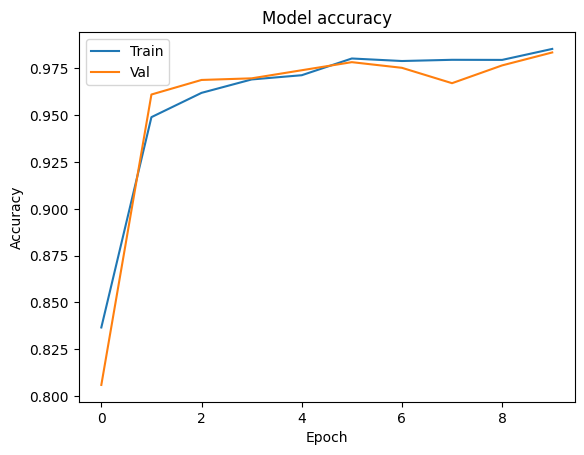

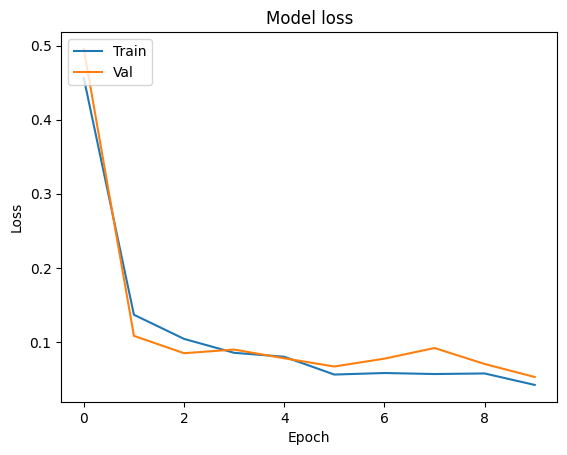

In [ ]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(progress.history['loss'])
plt.plot(progress.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 568ms/step


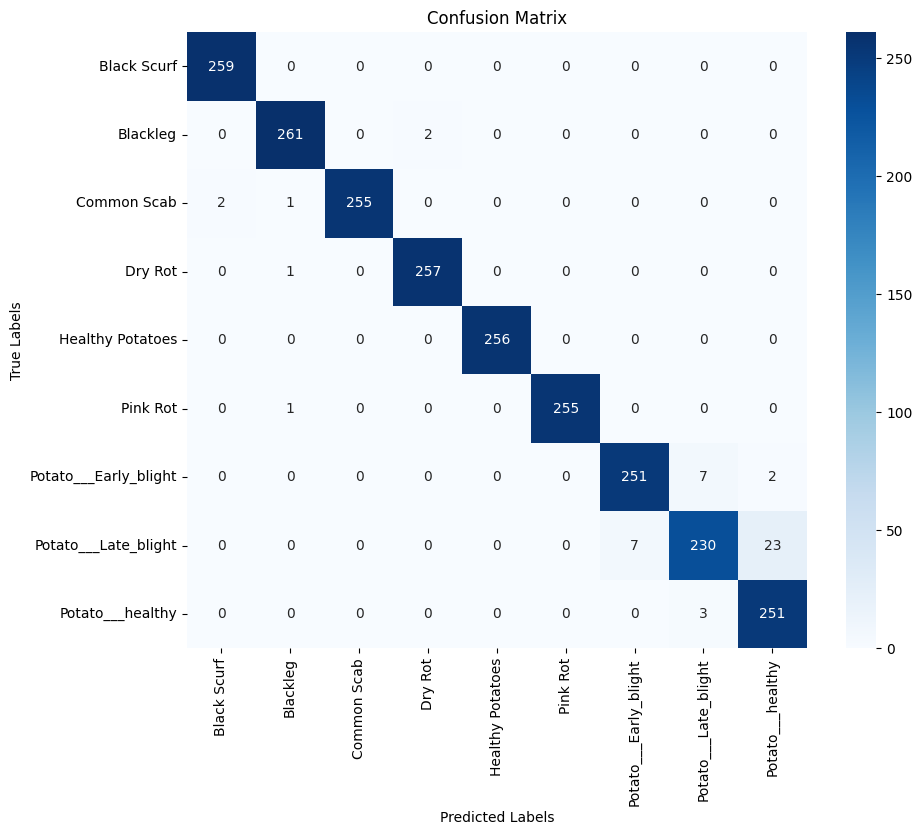

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision
precision = precision_score(test_labels, y_pred_classes, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(test_labels, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(test_labels, y_pred_classes, average='weighted')
print(f"F1-Score: {f1}")

# Calculate test accuracy
test_accuracy = accuracy_score(test_labels, y_pred_classes)
print(f"Test Accuracy: {test_accuracy}")


Precision: 0.9794060103436091
Recall: 0.9789156626506024
F1-Score: 0.978808943623927
Test Accuracy: 0.9789156626506024


In [ ]:
from sklearn.metrics import classification_report

# Ensure the correct number of labels are used
labels = list(test_generator.class_indices.values())  # Get the correct number of labels

# Generate the classification report with the correct number of target names
report = classification_report(test_labels, y_pred_classes, target_names=list(test_generator.class_indices.keys())[:len(labels)], labels=labels)
print(report)



                       precision    recall  f1-score   support

          Black Scurf       0.99      1.00      1.00       259
             Blackleg       0.99      0.99      0.99       263
          Common Scab       1.00      0.99      0.99       258
              Dry Rot       0.99      1.00      0.99       258
     Healthy Potatoes       1.00      1.00      1.00       256
             Pink Rot       1.00      1.00      1.00       256
Potato___Early_blight       0.97      0.97      0.97       260
 Potato___Late_blight       0.96      0.88      0.92       260
     Potato___healthy       0.91      0.99      0.95       254

             accuracy                           0.98      2324
            macro avg       0.98      0.98      0.98      2324
         weighted avg       0.98      0.98      0.98      2324



37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step


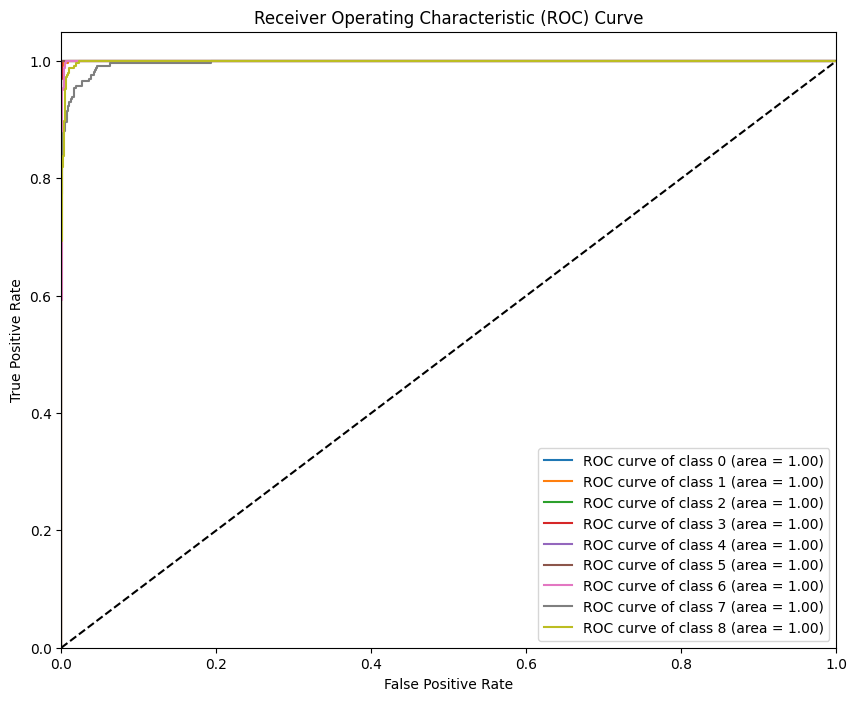

In [ ]:

from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Get the predicted probabilities for each class
y_pred_prob = model.predict(test_generator)

# Convert labels to one-hot encoding if necessary
y_true = to_categorical(test_generator.labels, num_classes=y_pred_prob.shape[1])

# Get the number of classes
num_classes = y_pred_prob.shape[1]

# Initialize lists to store ROC curves and AUC scores
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 263ms/step


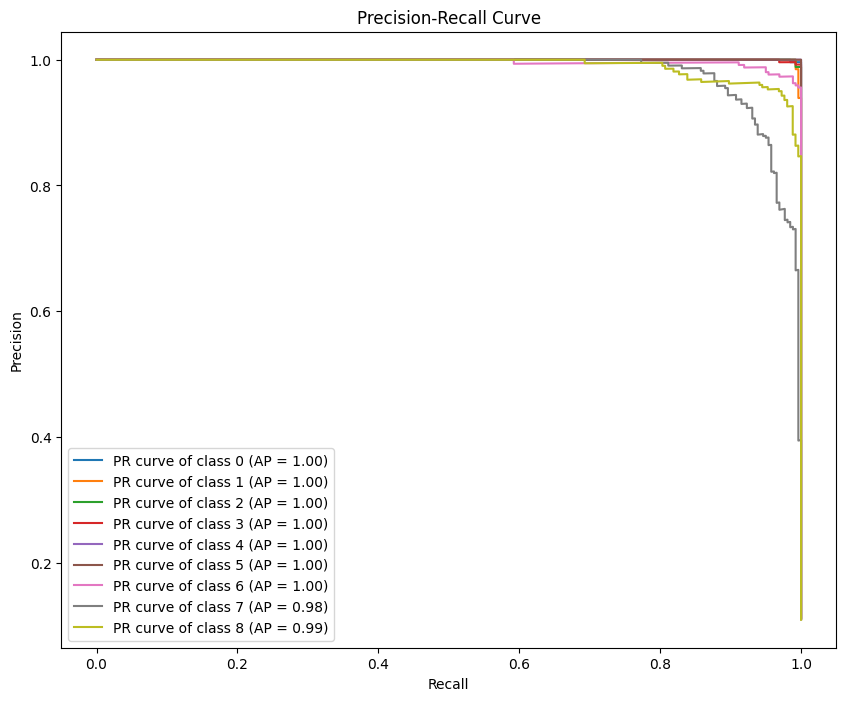

In [ ]:

from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.utils import to_categorical

# Get the predicted probabilities for each class
y_pred_prob = model.predict(test_generator)

# Convert labels to one-hot encoding if necessary
y_true = to_categorical(test_generator.labels, num_classes=y_pred_prob.shape[1])

# Get the number of classes
num_classes = y_pred_prob.shape[1]

# Initialize lists to store precision-recall curves and average precision scores
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision-recall curve and average precision for each class
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_pred_prob[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label='PR curve of class {0} (AP = {1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
